In [1]:
import pandas as pd 

data = pd.read_csv('train.csv')

In [6]:
data.info()

print(data['SalePrice'].describe())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
Final dataset shape: (1459, 63)


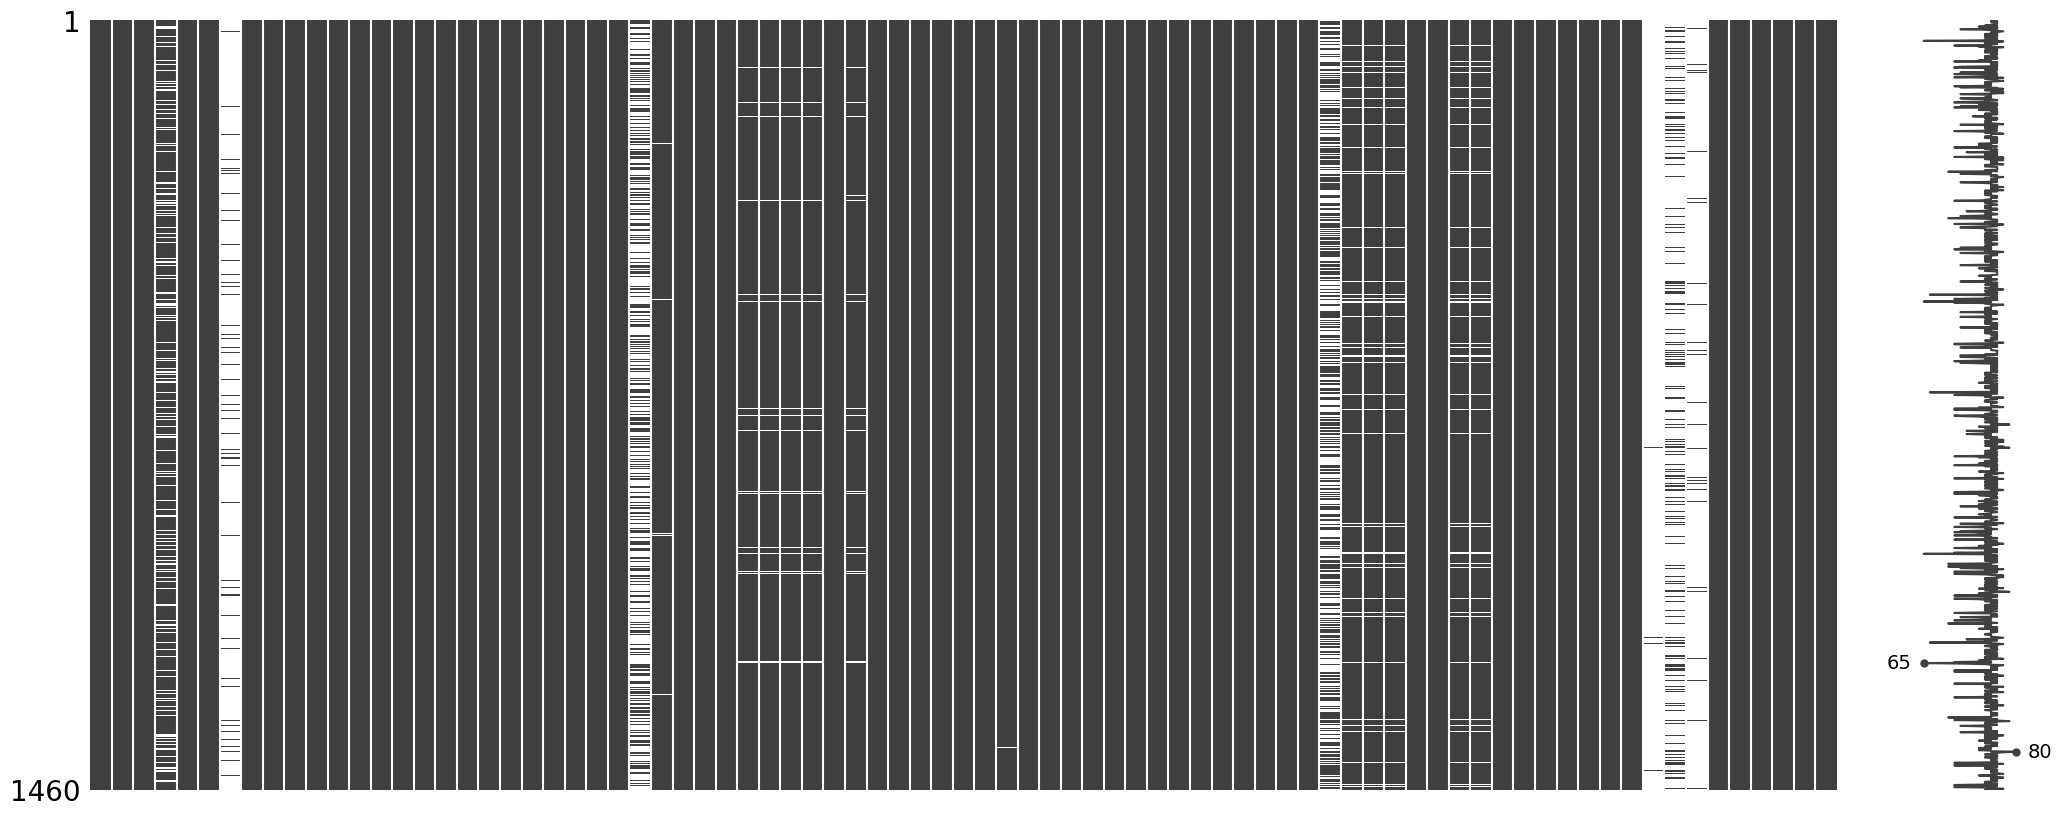

In [8]:
import missingno as msno
import pandas as pd 

data = pd.read_csv('train.csv')

msno.matrix(data)

# Calculate missing value ratio per column
missing_ratio = data.isnull().sum()/ len(data)

# Print only columns with missing values
print(missing_ratio[missing_ratio > 0])

# Remove columns with more than 5 missing values
columns_to_drop = missing_ratio[missing_ratio > 5 / len(data)].index
data_cleaned = data.drop(columns=columns_to_drop)

# Drop rows that still contain missing values
data_cleaned = data_cleaned.dropna()

print("Final dataset shape:", data_cleaned.shape)

In [ ]:
# 1. Kurtosis

# Definition: Measure of the "height" and "tail" of the data distribution.
# Purpose: Indicates whether the data has thinner or heavier tails than a normal (Gaussian) distribution.
# Types of kurtosis:
# Mesokurtic = 3  => Normal distribution
# Leptokurtic > 3 => Heavier tails (more outliers)
# Platykurtic < 3 => Lighter tails (fewer outliers)

# 2. Skewness

# Definition: Measure of the symmetry of a distribution.
# Purpose: Indicates whether the data are skewed to the left or right in relation to the mean.
# Types of skewness:
# Symmetric ≈ 0 --> Normal distribution (mean ≈ median ≈ mode)
# Positive skewness > 0 --> Longer tail to the right (extreme high values)
# Negative skewness < 0 --> Longer tail to the left (extreme low values)

# Calculate skewness (assimetria)
# print(data_cleaned.skew())

# Calculate kurtosis (curtose)
# print(data_cleaned.kurt())

# If skewness is too high, statistical models may not perform well. Sometimes we use transformations such as log, square root, etc.
# High skewness may indicate the presence of outliers — which can affect the mean, regression, etc.

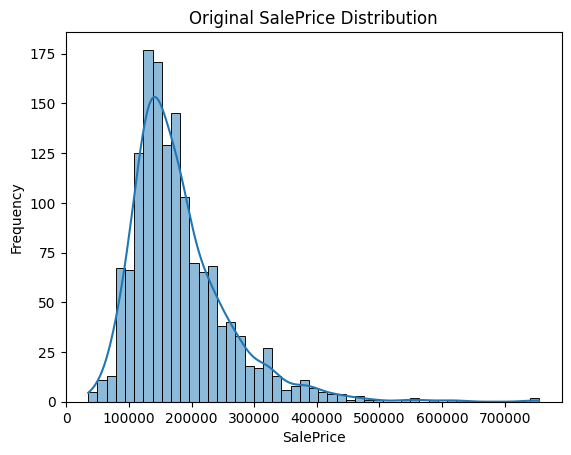

Kurtosis (original): 6.536281860064529
Skewness (original): 1.8828757597682129


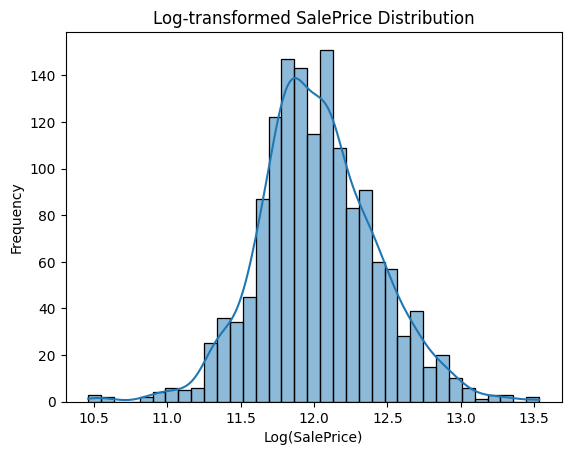

Kurtosis (log-transformed): 0.8095319958036296
Skewness (log-transformed): 0.12133506220520406


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize original distribution of the target variable
sns.histplot(data['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Calculate kurtosis and skewness before log transformation
print(f"Kurtosis (original): {data['SalePrice'].kurtosis()}")
print(f"Skewness (original): {data['SalePrice'].skew()}")

# Apply logarithmic transformation
log_price = np.log(data['SalePrice'])

# Visualize the log-transformed distribution
sns.histplot(log_price, kde=True)
plt.title("Log-transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Calculate kurtosis and skewness after log transformation
print(f"Kurtosis (log-transformed): {log_price.kurtosis()}")
print(f"Skewness (log-transformed): {log_price.skew()}")

# Interpretation before and after logarithmic transformation
# Original distribution
# Kurtosis: 6.53 → Much greater than 3 → Leptokurtic → Distribution with heavy tails, indicating many outliers.

# Skewness: 1.88 → Positive skewness → Many values ​​concentrated on the left, with a long tail on the right.

# Conclusion: The original variable does not follow a normal distribution. This can negatively affect algorithms that assume normality (such as linear regression).

# Distribution after logarithmic transformation
# Kurtosis: 0.81 → Close to 0 → The distribution is flatter (possibly platokurtic).

# Skewness: 0.12 → Very close to 0 → The distribution is almost symmetric, that is, almost normal.

# Conclusion: The logarithmic transformation was effective — the distribution of SalePrice is now much closer to normal, which is great for training statistical models.


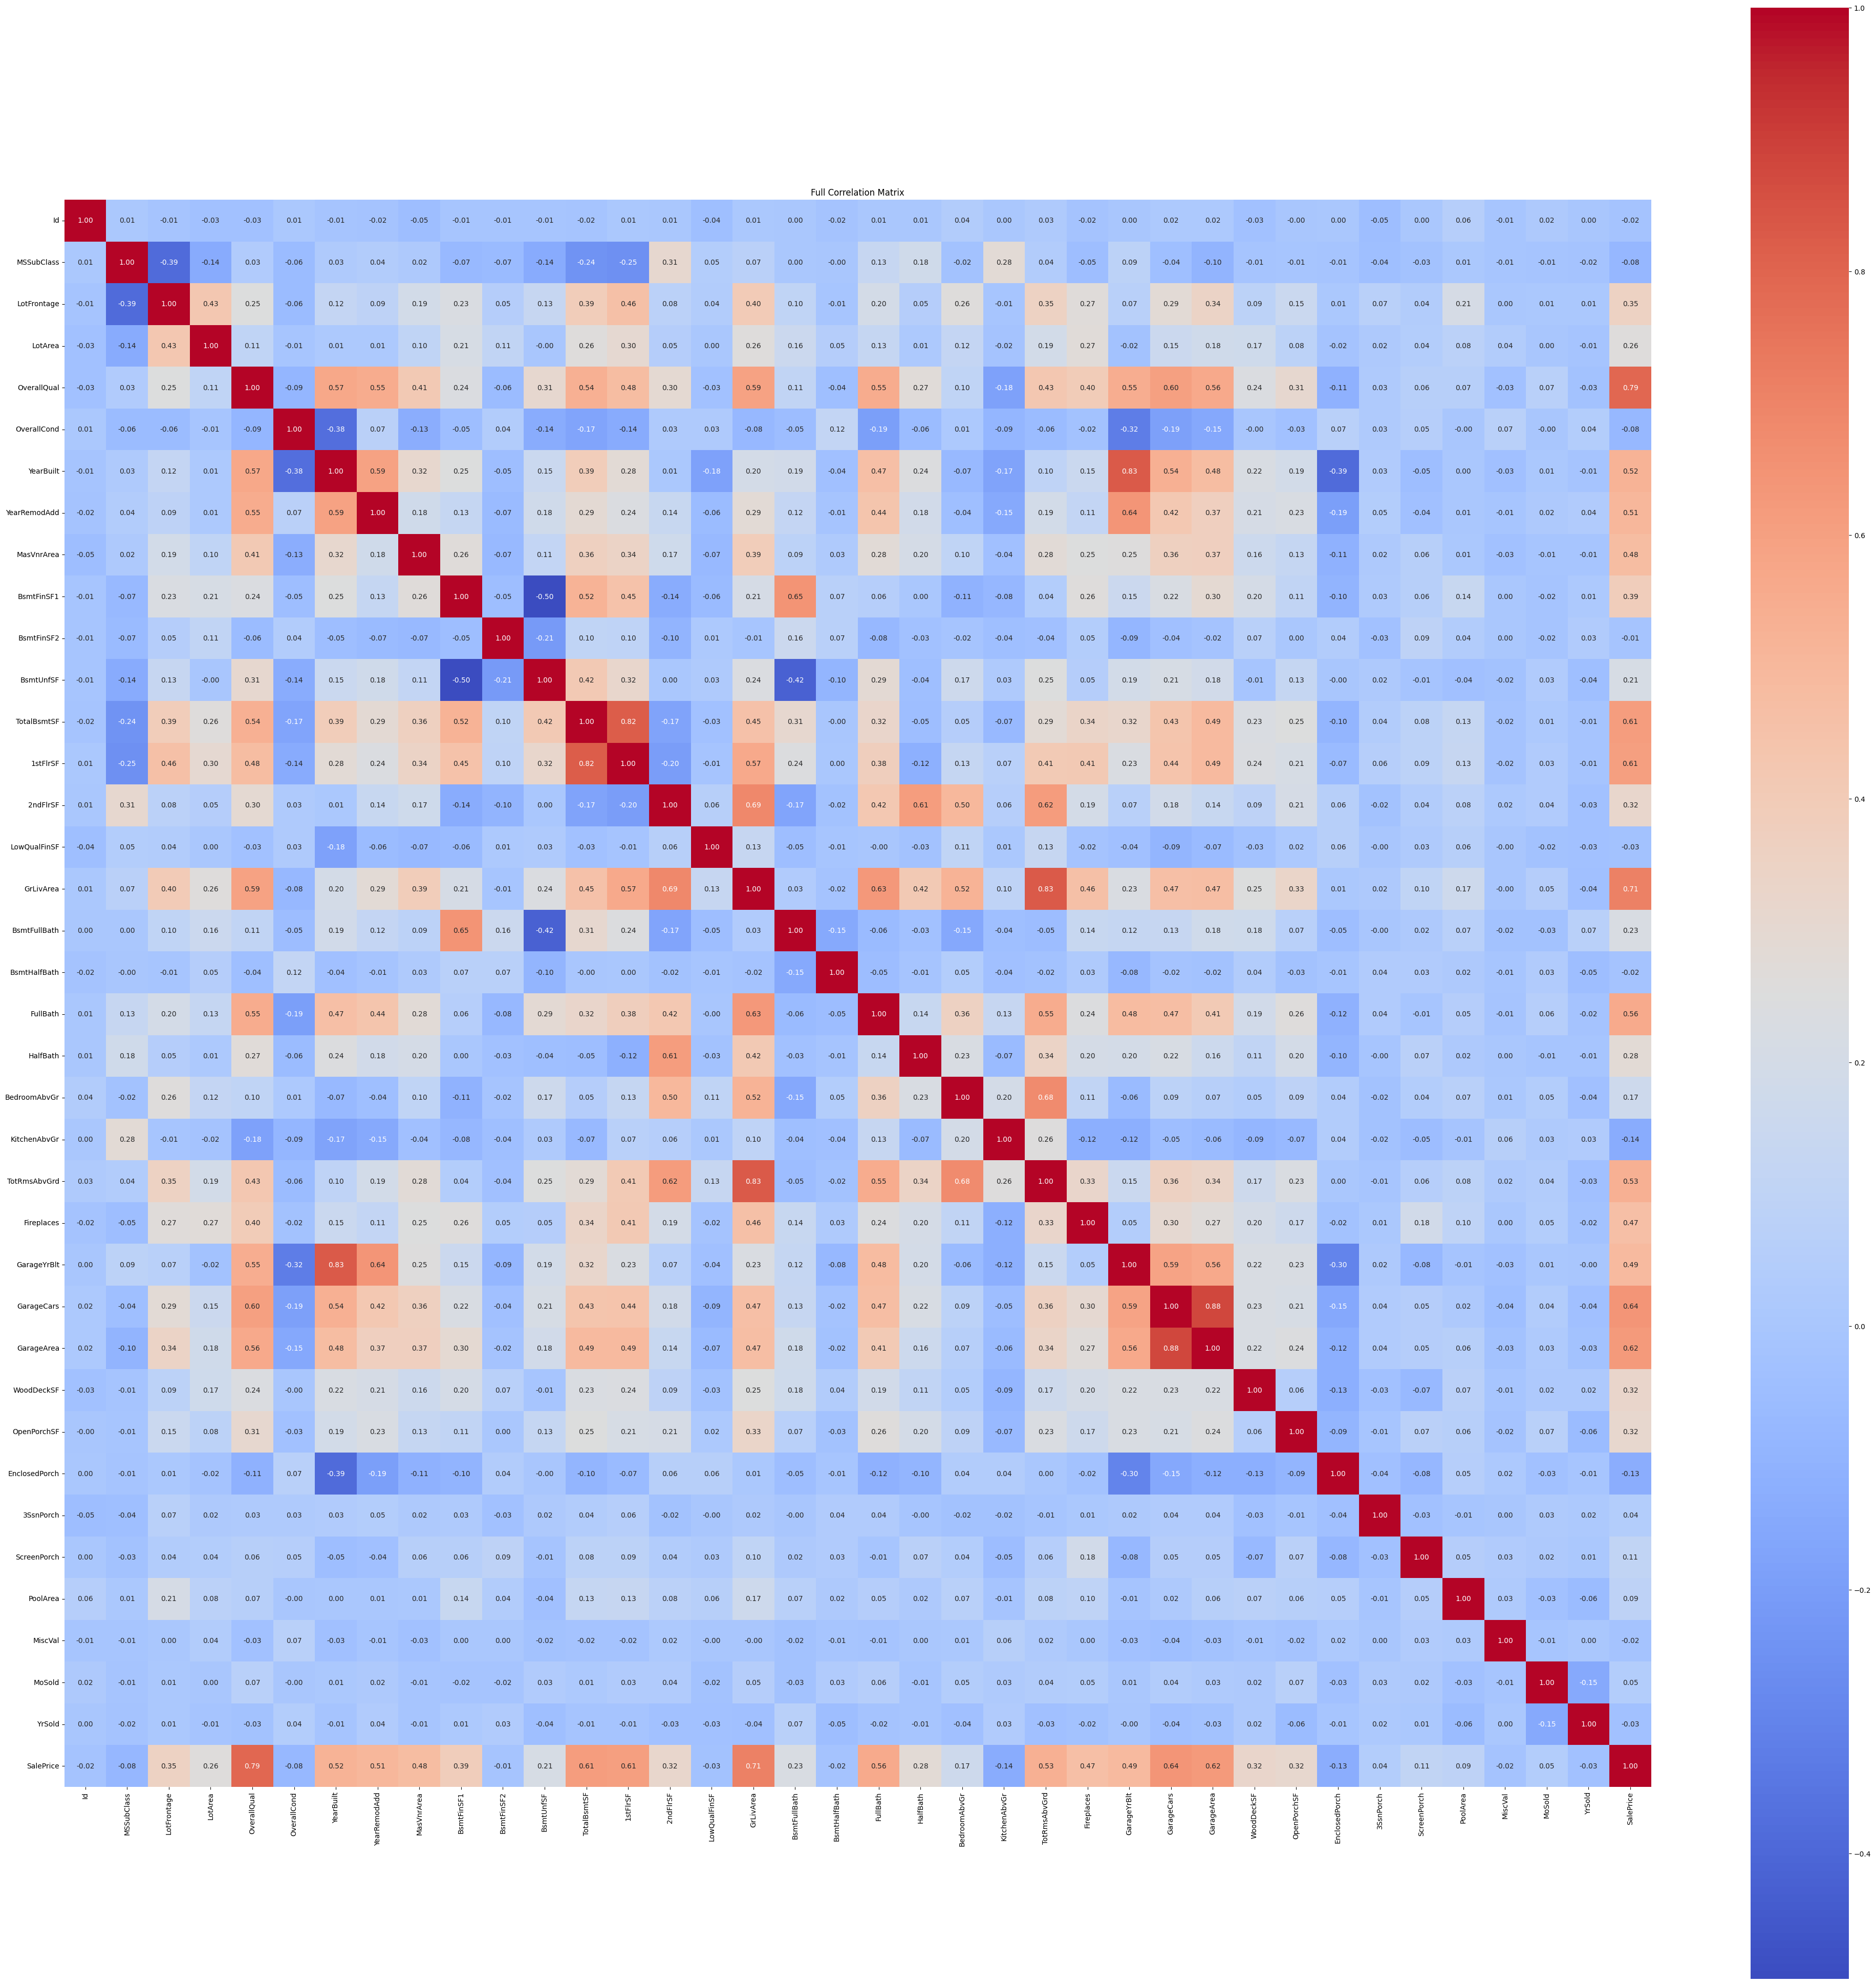

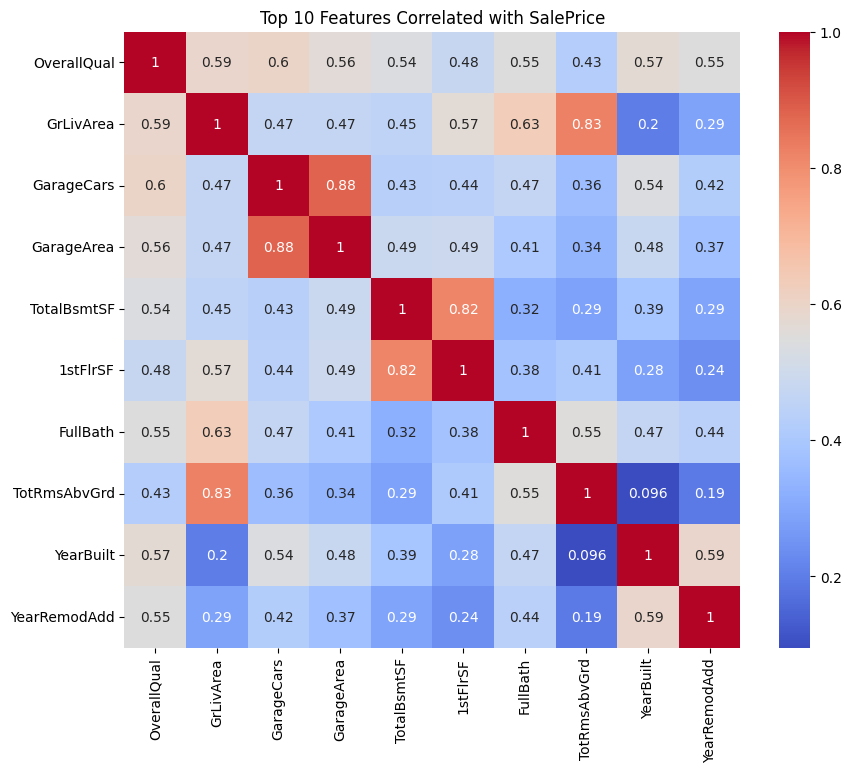

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display full heatmap of correlations
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, annot=True, fmt=".2f")
plt.title("Full Correlation Matrix")
plt.show()

# Get top 10 features most correlated with SalePrice
top10_corr_features = correlation_matrix['SalePrice'].nlargest(11).index  # 11 because it includes SalePrice itself
top10_corr_features = top10_corr_features.drop('SalePrice')

# Show heatmap of top 10 correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(data[top10_corr_features].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()


# | Rank | Feature        | Correlation (approx.) | Description                                                |
# | ---- | -------------- | --------------------- | ---------------------------------------------------------- |
# | 1    | `OverallQual`  | \~0.79                | Rates the overall material and finish quality of the house |
# | 2    | `GrLivArea`    | \~0.71                | Above ground living area in square feet                    |
# | 3    | `GarageCars`   | \~0.64                | Size of garage in terms of car capacity                    |
# | 4    | `GarageArea`   | \~0.62                | Size of garage in square feet                              |
# | 5    | `TotalBsmtSF`  | \~0.61                | Total square feet of basement area                         |
# | 6    | `1stFlrSF`     | \~0.60                | First floor area in square feet                            |
# | 7    | `FullBath`     | \~0.56                | Number of full bathrooms above ground                      |
# | 8    | `TotRmsAbvGrd` | \~0.54                | Total number of rooms above ground (excluding bathrooms)   |
# | 9    | `YearBuilt`    | \~0.52                | Original construction year                                 |
# | 10   | `YearRemodAdd` | \~0.50                | Year of remodeling or addition                             |


# Three pairs that are highly correlated with each other:
# GarageArea ↔ GarageCars → Both represent the garage

# GrLivArea ↔ TotRmsAbvGrd → More floor area tends to mean more rooms

# TotalBsmtSF ↔ 1stFlrSF → Basement and 1st floor sizes are generally correlated

